In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
large_img = cv2.imread('ex_image.png')
watermark = cv2.imread('ex_image_logo.png')
print(watermark)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


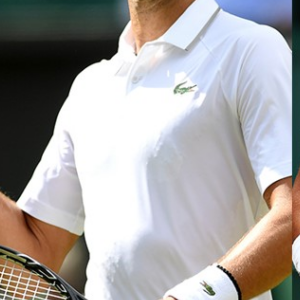

-1

In [ ]:
x_offset = 400
y_offset= 170

small_img = cv2.resize(watermark, (300, 300))

rows, columns, channels = small_img.shape
roi = large_img[y_offset:470, x_offset:700]

cv2_imshow(roi)
cv2.waitKey(0)

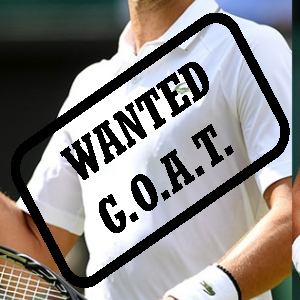

-1

In [ ]:
# logo image 빨간색 부분을 제외한 모든 것을 필터링 하도록 -> 회색조 이미지로 변경
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)

bg = cv2.bitwise_or(roi, roi, mask=mask)

cv2_imshow(bg)
cv2.waitKey(0)

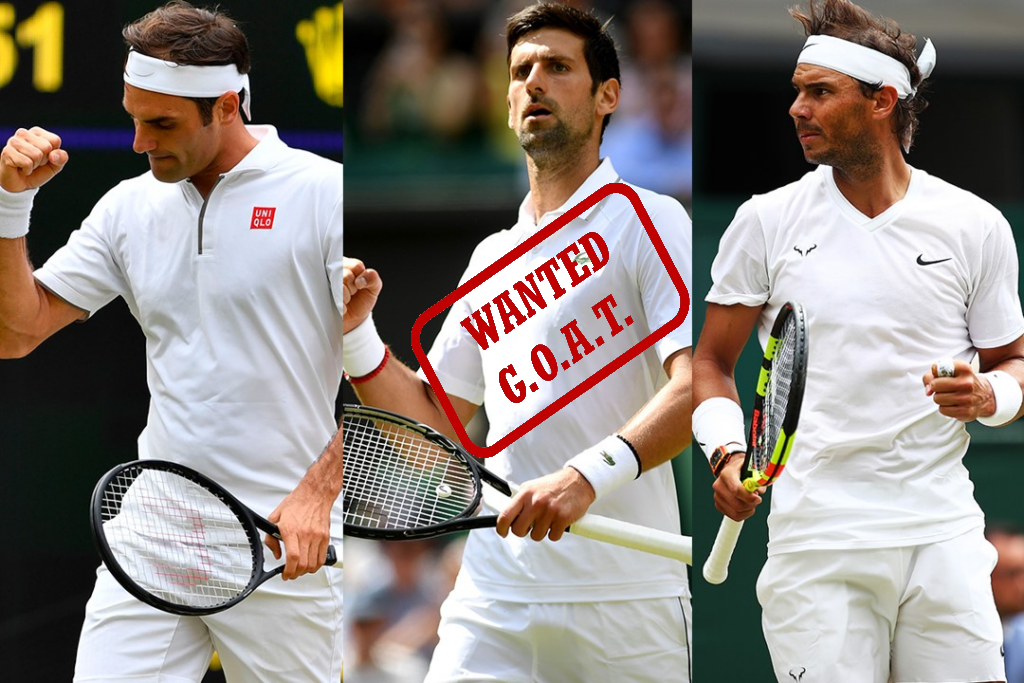

-1

In [ ]:
mask_inv = cv2.bitwise_not(mask)

fg = cv2.bitwise_and(small_img, small_img, mask=mask_inv)

final_roi = cv2.add(bg, fg)

large_img[y_offset: y_offset + small_img.shape[0],
          x_offset: x_offset + small_img.shape[1]] = final_roi

cv2_imshow(large_img)
cv2.waitKey(0)